In [2]:
import cv2 # opencv 라이브러리 호출
import numpy as np # numpy 라이브러리 호출 & numpy를 np라고 부르기로 함
from matplotlib import pyplot as plt #matplotlib 라이브러리 내 pyplot 이라는 함수를 가져오기


In [3]:
#영상 읽기
img = cv2.imread('unteol.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#opencv는 RGB가 아닌 BGR형태로 영상을 가지고 있음
# 따라서 BGR을 RGB로 바꾸어야함!!!

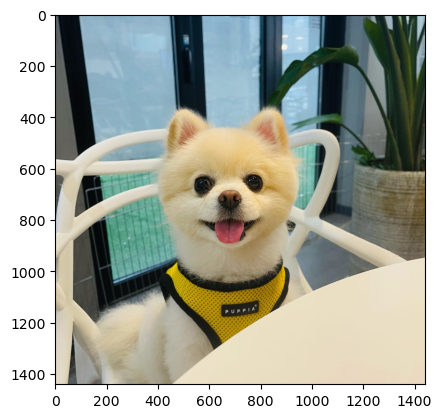

In [4]:
#영상 뿌리기
plt.imshow(img)

In [5]:
height, width, channel = img.shape
print('Height = %d, Width = %d' % (height, width))
print('Channel = %d' % channel)
print('Data type = %s' % img.dtype)

Height = 1440, Width = 1440
Channel = 3
Data type = uint8


In [6]:
img = img.astype('int')

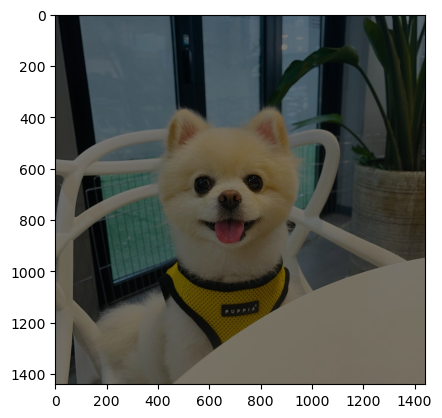

In [7]:
img1 = np.zeros((height, width, channel), dtype='uint8')
for i in range(height):
    for j in range(width):
        for k in range(channel):
            if (i + j) % 2 == 0: img1[i,j,k] = img[i,j,k]
plt.imshow(img1)

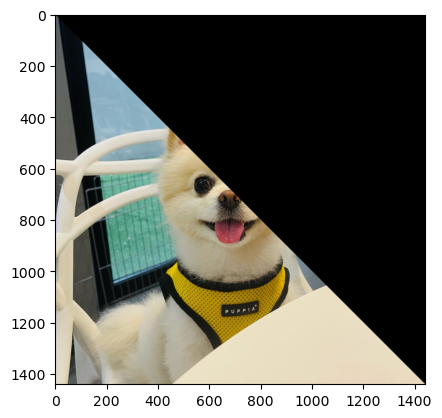

In [8]:
img1 = np.zeros((height, width, channel), dtype='uint8')
for i in range(height):
    for j in range(width):
        for k in range(channel):
            if i >= j: img1[i,j,k] = img[i,j,k]
plt.imshow(img1)

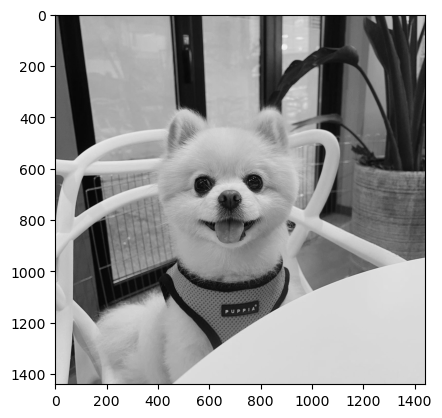

In [9]:
img = img.astype('int')
gray = np.zeros((height, width), dtype='uint8')
for i in range(height):
    for j in range(width):
        gray[i, j] = (img[i, j, 0] + img[i, j, 1] + img[i, j, 2])/3
plt.imshow(gray, cmap='gray')

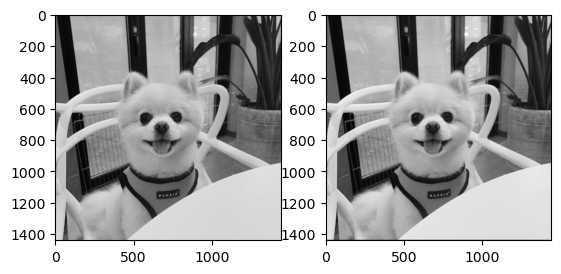

In [10]:
gray = gray.astype('int')
avg_blur = np.zeros((height, width), dtype="uint8")
for i in range(1, height-1):
    for j in range(1, width-1):
        avg_blur[i, j] = (gray[i-1, j] + gray[i,j-1] + gray[i+1,j] + gray[i,j+1])/4
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(avg_blur, cmap='gray')

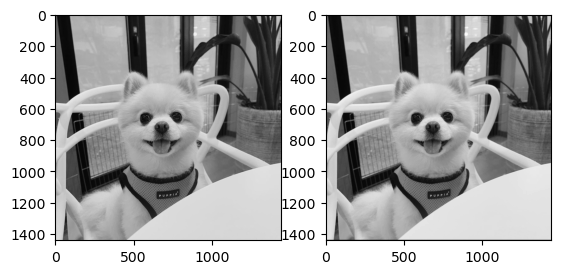

In [11]:
#Average filter
gray = gray.astype('int')
avg_blur = np.zeros((height, width), dtype="uint8")
for i in range(1, height-1):
    for j in range(1, width-1):
        avg_blur[i, j] = (gray[i-1, j] + gray[i,j-1] + gray[i+1,j] + gray[i,j+1]
                          + gray[i-1,j-1] + gray[i+1,j+1] + gray[i-1,j+1] + gray[i+1,j-1] + gray[i,j])/9
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(avg_blur, cmap='gray')

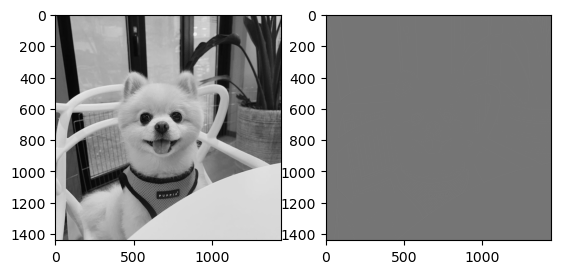

In [12]:
#Laplacian filter
gray = gray.astype('int')
laplacian = np.zeros((height, width), dtype="int")
for i in range(1, height-1):
    for j in range(1, width-1):
        laplacian[i, j] = (gray[i-1, j] + gray[i, j-1] + gray[i+1, j] + gray[i, j+1] - 4*gray[i,j])
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(laplacian, cmap='gray')

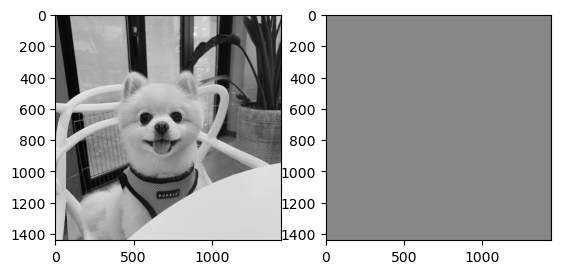

In [13]:
#Laplacian filter
gray = gray.astype('int')
laplacian = np.zeros((height, width), dtype="int")
for i in range(1, height-1):
    for j in range(1, width-1):
        laplacian[i, j] = gray[i-1, j] + gray[i, j-1] + gray[i+1, j] + gray[i, j+1] + gray[i-1, j-1] + gray[i+1, j+1] + gray[i-1, j+1] + gray[i+1, j-1] - 8*gray[i,j]
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(laplacian, cmap='gray')

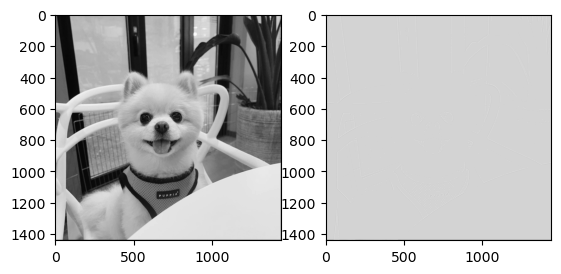

In [14]:
#Laplacian filter
gray2 = avg_blur.astype('int')
laplacian = np.zeros((height, width), dtype="int")
for i in range(1, height-1):
    for j in range(1, width-1):
        laplacian[i, j] = gray2[i-1, j] + gray2[i, j-1] + gray2[i+1, j] + gray2[i, j+1] + gray2[i-1, j-1] + gray2[i+1, j+1] + gray2[i-1, j+1] + gray2[i+1, j-1] - 8*gray2[i,j]
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray2, cmap='gray')
axarr[1].imshow(laplacian, cmap='gray')

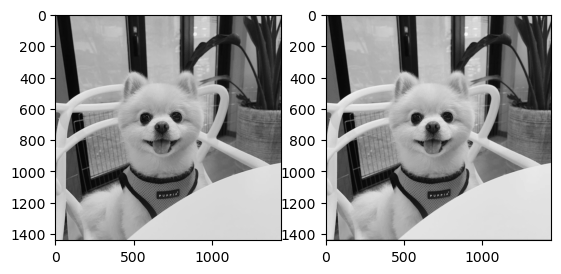

In [15]:
#Median filter
gray = gray.astype('int')
median = np.zeros((height, width), dtype="int")
for i in range(1, height-1):
    for j in range(1, width-1):
        median[i, j] = np.median(gray[i-1:i+2,j-1:j+2])
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(median, cmap='gray')

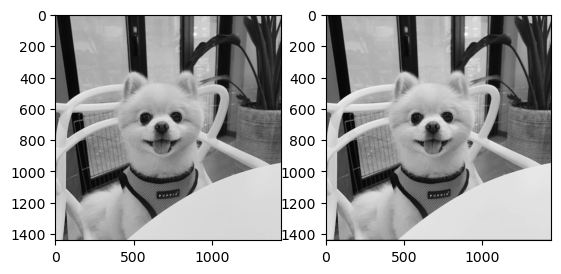

In [16]:
#Gaussian filter
pi, sigma = 3.14, 0.5
kernel_Gauss = np.zeros((3,3), dtype = float)
for i in range(3):
    for j in range(3):
        kernel_Gauss[i,j] = 1/(2*sigma**2) * np.exp(-((i-1)**2 + (j-1)**2) / (2*sigma**2))
kernel_Gauss = kernel_Gauss / np.sum(kernel_Gauss)
gray = gray.astype('int')
gaussian = np.zeros((height, width), dtype="int")
for i in range(1, height-1):
    for j in range(1, width-1):
        gaussian[i,j] = np.sum(gray[i-1:i+2, j-1:j+2] * kernel_Gauss)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(gaussian, cmap='gray')